<a href="https://colab.research.google.com/github/madhu-1013/DS_internship/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [ ]:
#1. logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('creditcard.csv')

# Separate features and target
X = data.drop('Amount', axis=1)  # Adjust 'target_column_name' as per your dataset
y = data['Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes and types
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_train data type:", y_train.dtype)

# Check class distribution
print("Class distribution in y_train:")
print(y_train.value_counts())

# Initialize and fit the model
logr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logr.fit(X_train_scaled, y_train)




X_train_scaled shape: (227845, 30)
y_train shape: (227845,)
y_train data type: float64
Class distribution in y_train:
Amount
1.00       10957
1.98        4848
0.89        3895
9.99        3841
15.00       2598
           ...  
5420.61        1
239.02         1
1176.90        1
954.00         1
66.48          1
Name: count, Length: 29397, dtype: int64


ValueError: Unknown label type: 'continuous'

# **Data Engineering**

In [ ]:
#1. Import the datset
import pandas as pd

# Step 1: Import the dataset
df = pd.read_csv("creditcard.csv")

# Step 2: Display the dataset
print(df.head())  # Display the first few rows to understand the structure

# Optionally, you can print column names to understand the features available
print(df.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Feature Selection 1

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Separate features (X) and target variable (Y)
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable

# Feature selection using SelectKBest with ANOVA F-value scoring
# Selecting top k features (example: k=10)
best_features = SelectKBest(score_func=f_classif, k=10)
X_selected = best_features.fit_transform(X, Y)

# Print selected feature names (if needed)
selected_features = X.columns[best_features.get_support()]
print("Selected Features:", selected_features)

# Optionally, print scores of selected features
feature_scores = pd.DataFrame(best_features.scores_, columns=['Score'])
feature_scores['Feature'] = X.columns
print("\nFeature Scores:")
print(feature_scores.nlargest(10, 'Score'))  # Display top 10 features with highest scores


Selected Features: Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')

Feature Scores:
           Score Feature
17  33979.168593     V17
14  28695.547788     V14
12  20749.822361     V12
10  14057.979985     V10
16  11443.349428     V16
3   11014.508305      V3
7   10349.605408      V7
11   6999.355047     V11
4    5163.832114      V4
18   3584.380605     V18


[0.01634719 0.0183851  0.02937737 0.04498795 0.04885428 0.02564515
 0.02204308 0.05894886 0.01780342 0.04408497 0.06633122 0.05463017
 0.06783279 0.01182575 0.0780512  0.01319518 0.0702342  0.08803984
 0.0440412  0.02333824 0.01410838 0.02270421 0.01492065 0.01114651
 0.01439308 0.01138741 0.01804476 0.01851257 0.01532641 0.01545888]


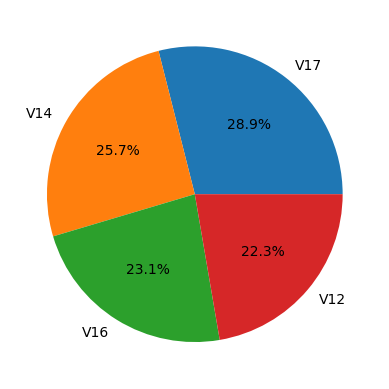

In [4]:
#Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

# Handle missing values in the target variable 'Y'
Y = Y.dropna() # Drop rows with missing values in 'Y'

# Align X_encoded and Y after handling missing values
X_encoded = X_encoded.loc[Y.index] # Select rows in X_encoded that correspond to non-missing Y values

model.fit(X_encoded,Y) # Fit the model with encoded features and non-missing target values
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# dealing with missing values
df['Amount'].fillna((df['Amount'].mean()), inplace=True)
df['Class'].fillna((df['Class'].mean()), inplace=True)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the credit card fraud detection dataset (assuming it's in CSV format)
creditcard_data = pd.read_csv('creditcard.csv')

# Split the dataset into training and test sets
train_df, test_df = train_test_split(creditcard_data, test_size=0.2, random_state=42)

# Define bins and labels for 'Amount' column
amount_bins = [0, 100, 500, 1000, 5000, 10000, 25000]
amount_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Apply bins to 'Amount' column
train_df['AmountGroup'] = pd.cut(train_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)
test_df['AmountGroup'] = pd.cut(test_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)

# Display the first few rows of the modified training data
print(train_df.head())

# Display the first few rows of the modified test data
print(test_df.head())

            Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

              V7        V8        V9  ...       V22       V23       V24  \
223361 -0.627978  0.035994  1.054560  ...  0.968305  0.053208 -0.278602   
165061  0.017959 -0.401619  0.040378  ...  0.421703  0.113442 -1.004095   
238186  0.787858  0.117276 -0.131275  ... -0.872959  0.083391  0.148178   
150562  0.847902 -0.081323  0.371579  ...  0.443431 -0.072754  0.448192   
138452 -0.435632  1.313760  0.536044  ... -0.230369  0.250717  0.066399   

             V25       V26       V27       V28  Amount  Class  Amoun

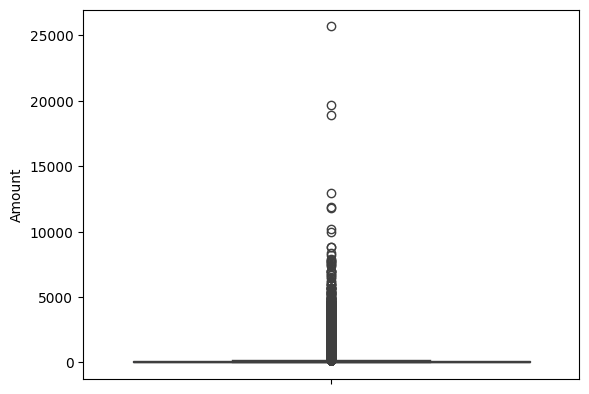

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Amount'])
plt.show()

In [10]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['Amount'].dtype == object:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['Amount'].fillna(df['Amount'].mean(), inplace=True) # Replace NaN with mean

print(df['Amount'])
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Amount'] < lower].values
out2=df[df['Amount'] > upper].values

df['Amount'].replace(out1,lower,inplace=True)
df['Amount'].replace(out2,upper,inplace=True)

print(df['Amount'])

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64
71.565
184.5125
-101.7475
0         149.6200
1           2.6900
2         184.5125
3         123.5000
4          69.9900
            ...   
284802      0.7700
284803     24.7900
284804     67.8800
284805     10.0000
284806    184.5125
Name: Amount, Length: 284807, dtype: float64


In [11]:
#Oversampling and Under Sampling

from collections import Counter
import numpy as np # import numpy

print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If there is a mismatch, investigate and fix the issue.
# For example, if Y is missing a value, you might append the appropriate value:
if X.shape[0] != Y.shape[0]:
    # Assuming Y is missing a value, append the most frequent class
    most_frequent_class = Y.value_counts().index[0]
    Y = np.append(Y, [most_frequent_class])  # Append the missing value

# After fixing the mismatch, proceed with resampling:
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)
from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({0: 284315, 1: 492})
Shape of X: (284807, 30)
Shape of Y: (284807,)
Counter({0: 284315, 1: 284315})


In [12]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas for handling DataFrames

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']

# Fill any remaining NaN values in the entire DataFrame 'X'
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

pca.fit(X)
X=pca.transform(X)

# --- Check and convert Y to binary if needed ---
# Check if Y is already binary (contains only two unique values)
if len(Y.unique()) != 2:
    print("Warning: Y does not appear to be binary. Converting...")
    # Convert Y to binary (assuming it's a continuous variable you want to classify)
    threshold = Y.mean()  # Choose a threshold for binary classification
    Y = (Y > threshold).astype(int)  # Convert to 0 and 1 based on threshold

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

# Check the types of your variables before calculating accuracy
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", np.unique(y_pred))

print(accuracy_score(y_test,y_pred))

[[ 9.48138596e+04  8.11864756e-01]
 [ 9.48138596e+04 -1.56683029e+00]
 [ 9.48128596e+04  8.44121596e-01]
 ...
 [-7.79741405e+04 -1.38699261e+00]
 [-7.79741404e+04  4.50081284e-01]
 [-7.79781404e+04  8.04237797e-01]]
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
0.9981508139929544


In [ ]:
#numerical to categorical
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Assume 'Amount' is a numerical feature to be converted to categorical
# Example: Convert 'Amount' into bins and create categorical labels
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']

df['Amount_Category'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# Optionally, drop the original numerical 'Amount' column
df.drop('Amount', axis=1, inplace=True)

# Display the first few rows to verify the conversion
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
#Oversampling and Under Sampling
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Separate features (X) and target variable (Y)
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable

# Define oversampling and undersampling strategies
over_sampler = SMOTE(sampling_strategy=0.1)  # Increase minority class to 10% of majority class
under_sampler = RandomUnderSampler(sampling_strategy=0.5)  # Decrease majority class to 50% of minority class

# Create a pipeline for sampling methods
sampling_pipeline = Pipeline([
    ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])

# Apply the sampling pipeline to X and Y
X_resampled, Y_resampled = sampling_pipeline.fit_resample(X, Y)

# Convert resampled data back to DataFrame (if necessary)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
Y_resampled_df = pd.Series(Y_resampled, name='Class')

# Display class distribution after resampling (optional)
print("Class Distribution after Resampling:")
print(Y_resampled_df.value_counts())


Class Distribution after Resampling:
Class
0    56862
1    28431
Name: count, dtype: int64


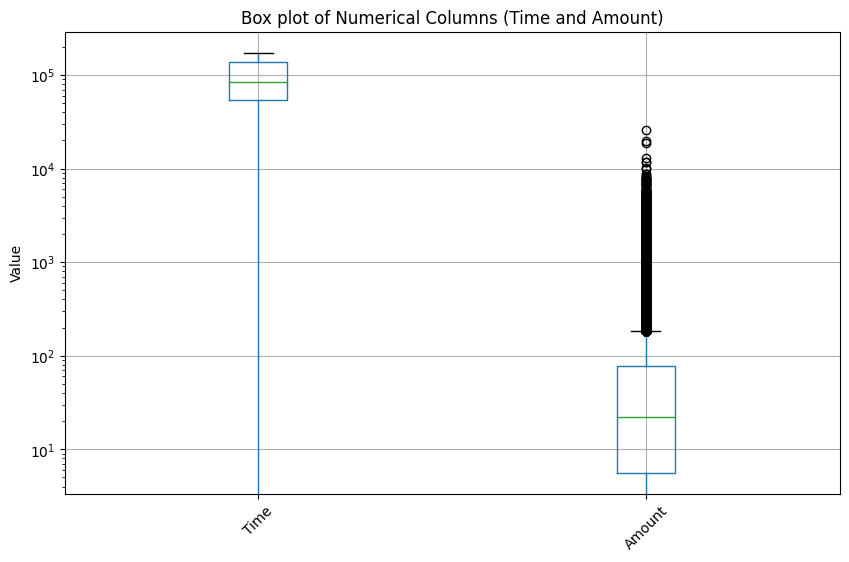

In [ ]:
#Identifying Outliers by ploting
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Select numerical columns for outlier detection (adjust as per your dataset)
numerical_columns = ['Time', 'Amount']

# Plot box plots for numerical columns to visualize outliers
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.yscale('log')  # Log scale for better visualization if data is highly skewed
plt.title('Box plot of Numerical Columns (Time and Amount)')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Dataset after handling outliers using IQR:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.

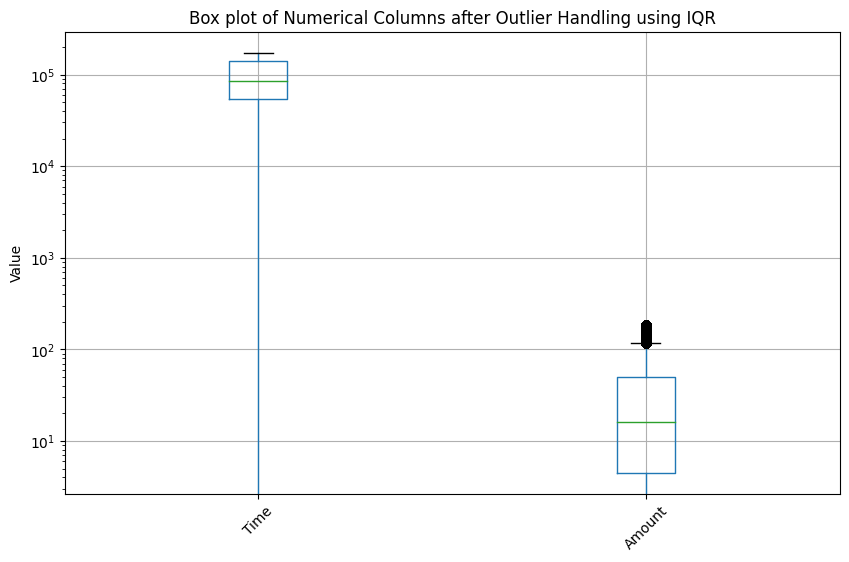

In [ ]:
#Dealing with Outliers using Interquantile Range
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Select numerical columns for outlier detection and handling (adjust as per your dataset)
numerical_columns = ['Time', 'Amount']

# Function to handle outliers using IQR
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds to filter outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outliers and replace with NaN or apply a transformation
        df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

    return df

# Handle outliers in selected numerical columns using IQR method
df_cleaned = handle_outliers(df.copy(), numerical_columns)

# Optionally, drop rows with NaN values after handling outliers
df_cleaned.dropna(inplace=True)

# Display statistics or plot box plots to verify outlier removal (optional)
print("Dataset after handling outliers using IQR:")
print(df_cleaned.head())

# Example: Plot box plots after outlier removal (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_cleaned[numerical_columns].boxplot()
plt.yscale('log')  # Log scale for better visualization if data is highly skewed
plt.title('Box plot of Numerical Columns after Outlier Handling using IQR')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


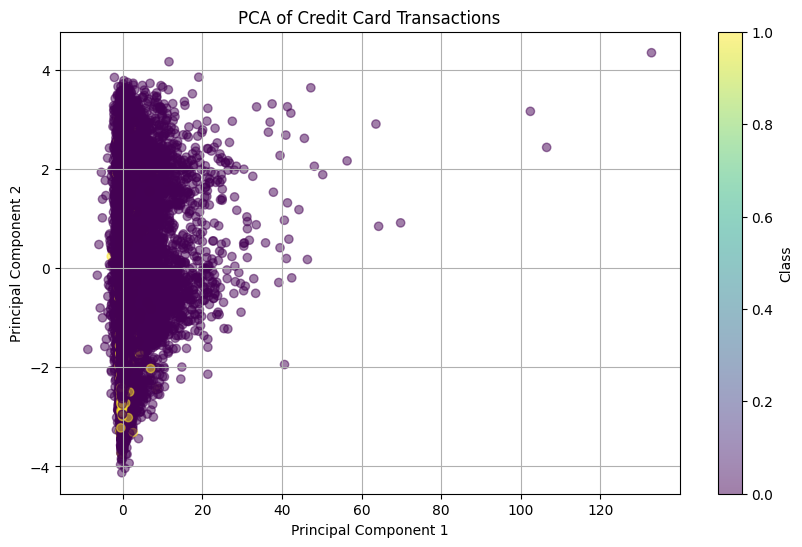

Explained Variance Ratio: [0.06527172 0.05610445]


In [ ]:
#Principal Component Analysis
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Separate features (X) and target variable (Y)
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable for visualization (optional)
df_final = pd.concat([df_pca, Y], axis=1)

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_final['PC1'], df_final['PC2'], c=df_final['Class'], cmap='viridis', alpha=0.5)
plt.title('PCA of Credit Card Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# ** ML Classification**

In [13]:
# naive
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Read the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the feature and target variables
x = df.drop(['Time', 'Amount'], axis=1)
y = df['Class']

# One-hot encode categorical variables if necessary
x = pd.get_dummies(x)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()
# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = nb.predict(X_test)

# Print the accuracy score
print("Naive Bayes: ", accuracy_score(y_test, y_pred1))

Naive Bayes:  1.0


In [14]:
#Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import SimpleImputer

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


In [15]:
#  Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaN values

rf=RandomForestClassifier()

# Assuming 'x' and 'y' are defined from previous cells, handle NaN in 'y' before splitting
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent for categorical target
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)) # Reshape for single feature imputation
y_imputed = y_imputed.ravel() # Flatten back to 1D array

X_train,X_test,y_train,y_test=train_test_split(x, y_imputed, random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9999882962910946


# **Visualization**

In [16]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("creditcard.csv")

#Preparing X and Y

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']


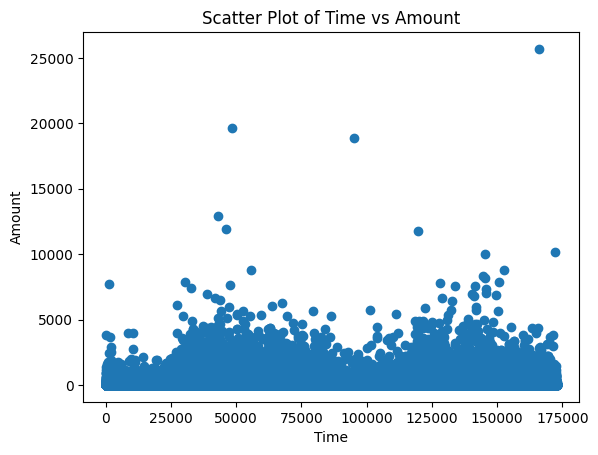

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('creditcard.csv')

# Plotting PetalLengthCm vs PetalWidthCm
plt.scatter(wine_data['Time'], wine_data['Amount'])
plt.title("Scatter Plot of Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

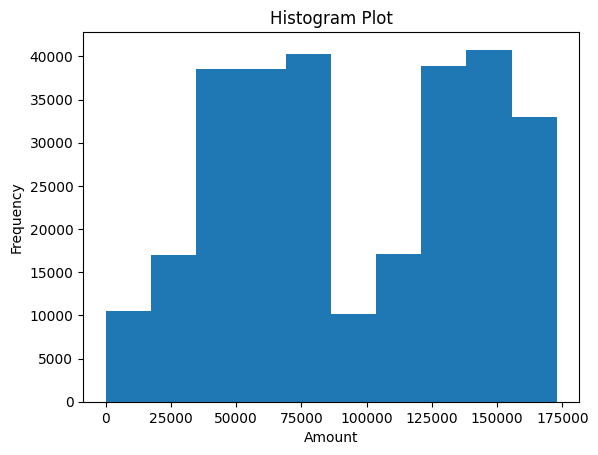

In [18]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Time"])
plt.title("Histogram Plot")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

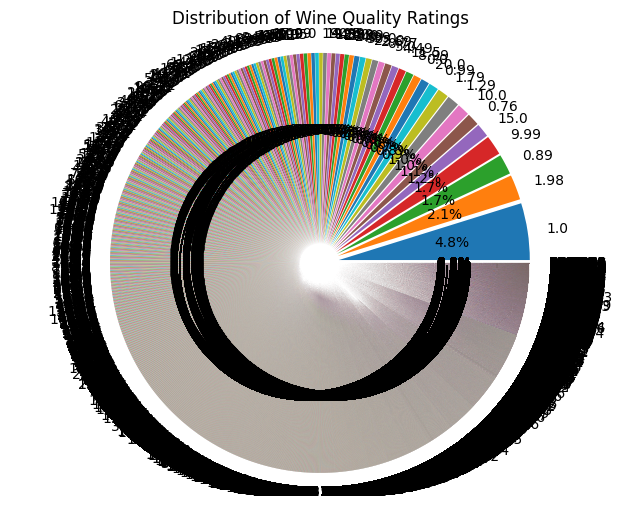

In [20]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('wine_quality.csv')

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'quality' category
quality_counts = df['Amount'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(quality_counts)) # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', explode=explode) # Use the dynamically created explode tuple
plt.title('Distribution of Wine Quality Ratings')
plt.axis('equal')
plt.show()

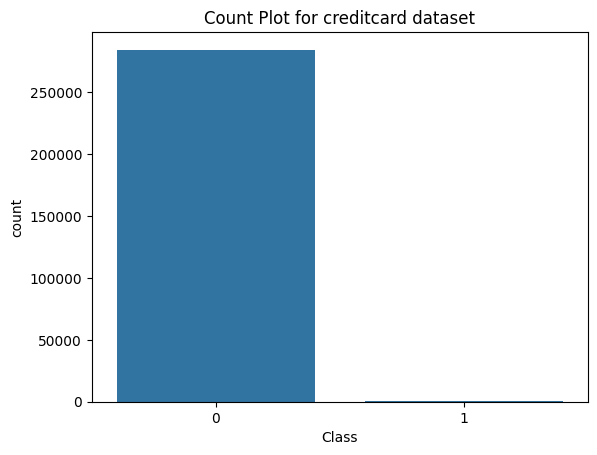

In [21]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Class', data = df)
plt.title("Count Plot for creditcard dataset")
plt.show()

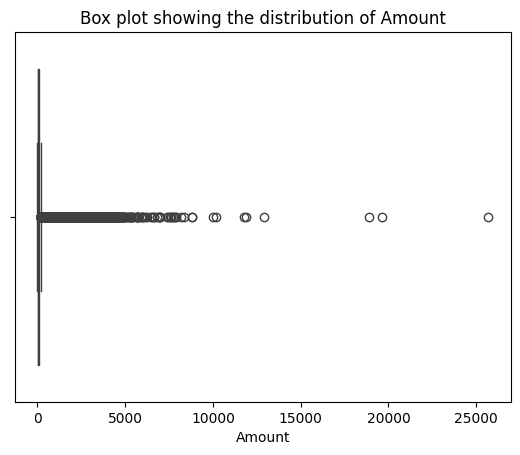

In [22]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='Amount', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Amount")
plt.show()

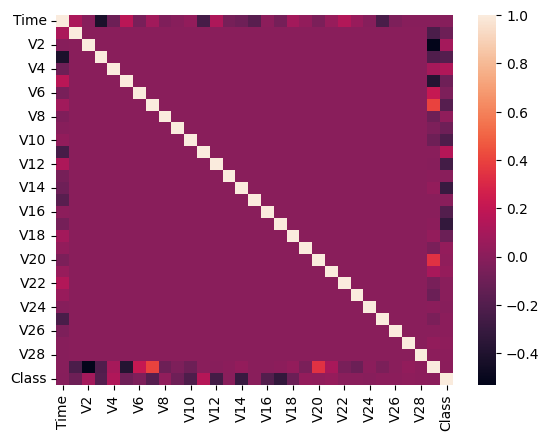

In [23]:
#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns for correlation calculation
sns.heatmap(numeric_df.corr())
plt.show()